IEEE Fraud Detection

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [0]:
# TODO: code and runtime results
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c ieee-fraud-detection

Saving kaggle.json to kaggle (2).json
train_transaction.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_identity.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_transaction.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_identity.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


Write your answer here

In [0]:
import pandas as pd
transactions = pd.read_csv('train_transaction.csv.zip')
transactions.shape
identities = pd.read_csv('train_identity.csv.zip')
identities.shape
identities.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [0]:
fraudTransactions = transactions[transactions['isFraud'] == 1]
nonFraudTransactions = transactions[transactions['isFraud'] == 0]

In [0]:
fraudTransactions1 = fraudTransactions[['TransactionID','TransactionDT','TransactionAmt','ProductCD','card4','card6',
                                        'P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2']]
identitiesWithDTDI = identities[['TransactionID','DeviceType', 'DeviceInfo']]
fraudTransactions1WithIdentities = pd.merge(fraudTransactions1, identitiesWithDTDI, on='TransactionID')

nonFraudTransactions1 = nonFraudTransactions[['TransactionID','TransactionDT','TransactionAmt','ProductCD','card4','card6',
                                        'P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2']]
nonFraudTransactions1WithIdentities = pd.merge(nonFraudTransactions1, identitiesWithDTDI, on='TransactionID')
fraudTransactions1WithIdentities.describe()
fraudTransactions1WithIdentities.head()

fraudTransactions1.shape
nonFraudTransactions1.shape
nonFraudTransactions1WithIdentities.shape
fraudTransactions1WithIdentities['DeviceInfo'].value_counts()

Windows                                   3121
iOS Device                                1240
MacOS                                      278
hi6210sft Build/MRA58K                     180
SM-A300H Build/LRX22G                      169
rv:57.0                                    103
Trident/7.0                                 96
rv:11.0                                     76
LG-D320 Build/KOT49I.V10a                   61
SM-J700M Build/MMB29K                       60
SM-J320M Build/LMY47V                       57
CRO-L03 Build/HUAWEICRO-L03                 51
KFFOWI Build/LVY48F                         51
rv:58.0                                     49
SM-A510M Build/MMB29K                       45
rv:59.0                                     44
Moto G (4) Build/NPJ25.93-14.7              40
SM-J500M Build/LMY48B                       39
SM-G920P Build/NRD90M                       39
SM-G610M Build/MMB29K                       37
Moto G (5) Plus Build/NPNS25.137-15-11      35
VS5012 Build/

It looks like the most number of fraudulent transactions have been done through a Windows PC, with 3121 transactions.

iOS comes a distant 2nd with around 1200 fraudulent transactions.

In [0]:
fraudTransactions1['TransactionAmt'].value_counts()

117.000     719
59.000      646
150.000     561
100.000     523
49.000      469
200.000     423
226.000     390
300.000     355
50.000      353
171.000     272
77.000      266
39.000      242
335.000     234
445.000     231
107.950     221
97.000      213
250.000     205
29.000      201
554.000     179
994.000     175
92.000      145
141.000     143
500.000     141
34.000      140
15.000      137
280.000     135
25.000      131
75.000      128
87.000      113
54.000      106
           ... 
191.913       1
36.438        1
17.952        1
114.230       1
355.440       1
58.898        1
177.985       1
9.591         1
244.950       1
39.025        1
11.435        1
295.596       1
794.950       1
33.490        1
385.990       1
93.818        1
7.255         1
15.741        1
106.500       1
39.178        1
570.000       1
3076.970      1
109.127       1
28.579        1
17.082        1
73.838        1
117.456       1
46.786        1
355.000       1
13.381        1
Name: TransactionAmt, Le

Here we get a very **interesting insight**. The** maximum number** of fraudulent transactions has been done for a **product with a price tag of 117**. It means that it's **easy** to do a fraudulent transaction for a **particular product**.

Same is the case for **some other items** with a particular price tag.

We perform this operation **only on the Transaction table** as when we join the table with the Identity table, the number of rows **reduces to around 11k from 21k**, which I feel is a significant reduction in the sample size.

In [0]:
fraudTransactions1['ProductCD'].value_counts()

W    8969
C    8008
H    1574
R    1426
S     686
Name: ProductCD, dtype: int64

In [0]:
fraudTransactions1['card4'].value_counts()

visa                13373
mastercard           6496
discover              514
american express      239
Name: card4, dtype: int64

When we take it as a percentage 

The most fraudulent transactions have been done through the **visa** card

On the second place is a distant mastercard with as many as half the transactions than that done through **visa**

All the other values are too few relative to **mastercard** and **visa**

In [0]:
nonFraudTransactions1['card4'].value_counts()

visa                371394
mastercard          182721
american express      8089
discover              6137
Name: card4, dtype: int64

When we look for the percentage, 

*   Visa and mastercard have similar percentage of fraudulent transactions out of overall transactions. The rate is around 3 %
*   8% of all Discover card transactions are fraudulent which is quite high for a reputed firm.

*   American Express stands at around 5% 




In [0]:
nonFraudTransactions1['card6'].value_counts()

debit              429264
credit             139036
debit or credit        30
charge card            15
Name: card6, dtype: int64

## Part 2 - Transaction Frequency

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Text(0, 0.5, 'Number of transactions')

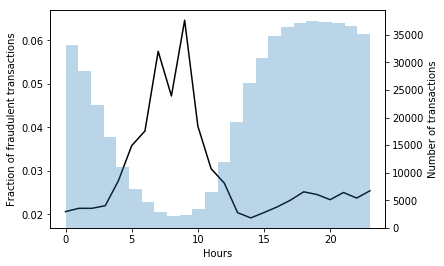

In [0]:
trnFreq = transactions[['TransactionID', 'TransactionDT', 'addr2', 'isFraud']]
trnFreq.head()
trnFreq['addr2'].value_counts()
trnFreq['TransactionDT'].value_counts()

trnFreq87 = trnFreq[trnFreq['addr2'] == 87.0]
import matplotlib.pyplot as plt
 
import numpy as np
def make_hour_feature(df, tname='TransactionDT'):

    hours = df[tname] / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

trnFreq87['hours'] = make_hour_feature(trnFreq87)
plt.plot(trnFreq87.groupby('hours').mean()['isFraud'], color='k')
ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(trnFreq87['hours'], alpha=0.3, bins=24)
ax.set_xlabel('Hours')
ax.set_ylabel('Fraction of fraudulent transactions')

ax2.set_ylabel('Number of transactions')


TransactionID

DeviceType (mobile/desktop/...)

DeviceInfo (Windows/MacOS/…)

TransactionDT (time delta from reference)

TransactionAmt (amount in USD)

ProductCD (product code - W/C/H/R/...)

card4 (card issuer)

card6 (debit/credit)

P_emaildomain (purchaser email)

R_emaildomain (recipient email)

addr1 / addr2 (billing region / billing country)

dist1 / dist2 (some form of distance - address, zip code, IP, phone, …)


In [0]:
# TODO: code to generate the frequency graph

Write your answer here

## Part 3 - Product Code

In [0]:
transactions.head()
transactionsProdAmt = transactions[['TransactionID', 'TransactionAmt', 'ProductCD']]
transactionsProdAmt.head()
transactionsProdAmt['TransactionAmt'].value_counts()
transactionsProdAmt.groupby('ProductCD')['TransactionAmt'].mean()

ProductCD
C     42.872353
H     73.170058
R    168.306188
S     60.269487
W    153.158554
Name: TransactionAmt, dtype: float64

The product code R corresponds to the most expensive products with the mean of all the amounts coming out to be 168.31

The product code C corresponds to the least expensive products with the mean of 42.87

## Part 4 - Correlation Coefficient

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Pearsons correlation considering sum of Transaction Amount: 0.651


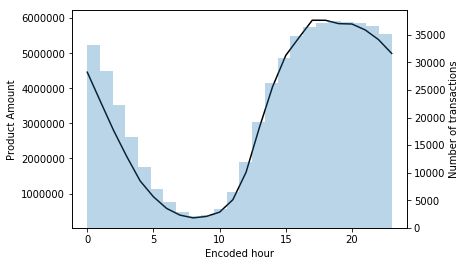

In [0]:
# TODO: code to calculate correlation coefficient
todAmt = transactions[['TransactionID', 'TransactionDT', 'addr2', 'TransactionAmt','ProductCD', 'isFraud', 'card6']]
todAmt.head()
todAmt['addr2'].value_counts()
todAmt['TransactionDT'].value_counts()


todAmt87 = todAmt[todAmt['addr2'] == 87.0]
import matplotlib.pyplot as plt
 
import numpy as np
def make_hour_feature(df, tname='TransactionDT'):
    hours = df[tname] / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

todAmt87['hours'] = make_hour_feature(todAmt87)
plt.plot(todAmt87.groupby('hours')['TransactionAmt'].sum(), color='k')
ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(todAmt87['hours'], alpha=0.3, bins=24)
ax.set_xlabel('Encoded hour')
ax.set_ylabel('Product Amount')
ax2.set_ylabel('Number of transactions')

from scipy.stats import pearsonr
hour = []
for i in range(24):
  hour.append(i)
todAmt87SumGB = todAmt87.groupby('hours')['TransactionAmt'].sum()
todAmt87SumGB.describe()
list(todAmt87SumGB)
corr,_ = pearsonr(hour,todAmt87SumGB)
print('Pearsons correlation considering sum of Transaction Amount: %.3f' % corr)


Pearsons correlation considering mean of Transaction Amount: 0.756


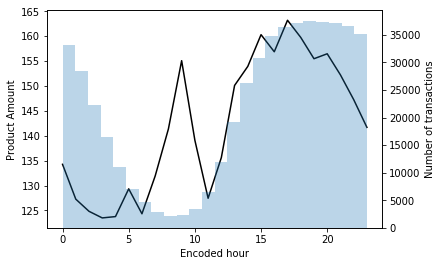

In [0]:
plt.plot(todAmt87.groupby('hours')['TransactionAmt'].mean(), color='k')
axM = plt.gca()
axM2 = axM.twinx()
_ = axM2.hist(todAmt87['hours'], alpha=0.3, bins=24)
axM.set_xlabel('Encoded hour')
axM.set_ylabel('Product Amount')
axM2.set_ylabel('Number of transactions')

todAmt87MeanGB = todAmt87.groupby('hours')['TransactionAmt'].mean()
todAmt87MeanGB.describe()
list(todAmt87MeanGB)
corr,_ = pearsonr(hour,todAmt87MeanGB)
print('Pearsons correlation considering mean of Transaction Amount: %.3f' % corr)

Write your answer here

## Part 5 - Interesting Plot

In [0]:
# TODO: code to generate the plot here.

The plots of time of day vs product is interesting and it's getting a correlation co-efficient of 0.65

Also, the plost of card6 variable vs isFraud is interesting.
The percentage of number of fraudulent transactions for credit card is almost double than that of debit card!!!!
Beware credit card holders!


## Part 6 - Prediction Model

Write your answer here

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

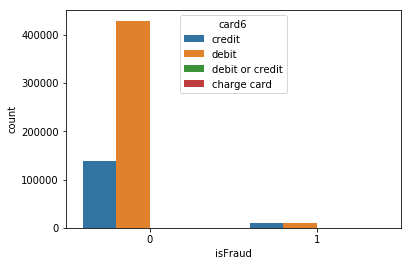

In [0]:
# TODO: code for your final model
import seaborn as sns
sns.countplot(x='isFraud',hue = 'card6', data=transactions)
transactionAmtByFraudness = transactions.groupby('isFraud')['TransactionAmt'].sum()
list(transactionAmtByFraudness)

transactions.isnull().sum()
transactions.groupby('isFraud').mean()

from sklearn.model_selection import train_test_split
cleanup_Prod = {"ProductCD":     {"C": 4, "H": 2, "S": 3, "R":4, "W":5}}
cleanup_card6 = {"card6": {"debit":1, "credit":2, "debit or credit":3, "charge card": 4}}
todAmtReplaced = todAmt87.replace(cleanup_Prod)
feature_cols = ['TransactionAmt', 'hours', 'ProductCD']

X = todAmtReplaced[feature_cols] # Features
y = todAmtReplaced.isFraud # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#split dataset in features and target variable

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


In [0]:
todAmtReplaced['card6'].fillna(0, inplace=True)
todAmtReplaced['card6'].isna().sum()
transactions['DeviceType'].value_counts()

In [0]:
transactions_test = pd.read_csv('test_transaction.csv.zip')
transactions_test.replace(cleanup_Prod, inplace=True)

transactions_test['hours'] = make_hour_feature(transactions_test)
cleanup_Prod = {"ProductCD":     {"C": 4, "H": 2, "S": 3, "R":4, "W":5}}

In [0]:
transactions_test.head()
transactions_test_columns = transactions_test[['TransactionAmt', 'hours', 'ProductCD']]
transactions_test_columns.head()

,TransactionAmt,hours,ProductCD
0,31.95,0.0,5
1,49.00,0.0,5
2,171.00,0.0,5
3,284.95,0.0,5
4,67.95,0.0,5


In [0]:
y_pred=logreg.predict(transactions_test_columns)

sampleSubmission = pd.read_csv("sample_submission.csv.zip")
sampleSubmission['isFraud'] = y_pred
sampleSubmission.head()

sampleSubmission.to_csv("sampleSubmission1.csv")
sampleSubmission.head()

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0


## Part 7 - Final Result

**Score**: 0.88